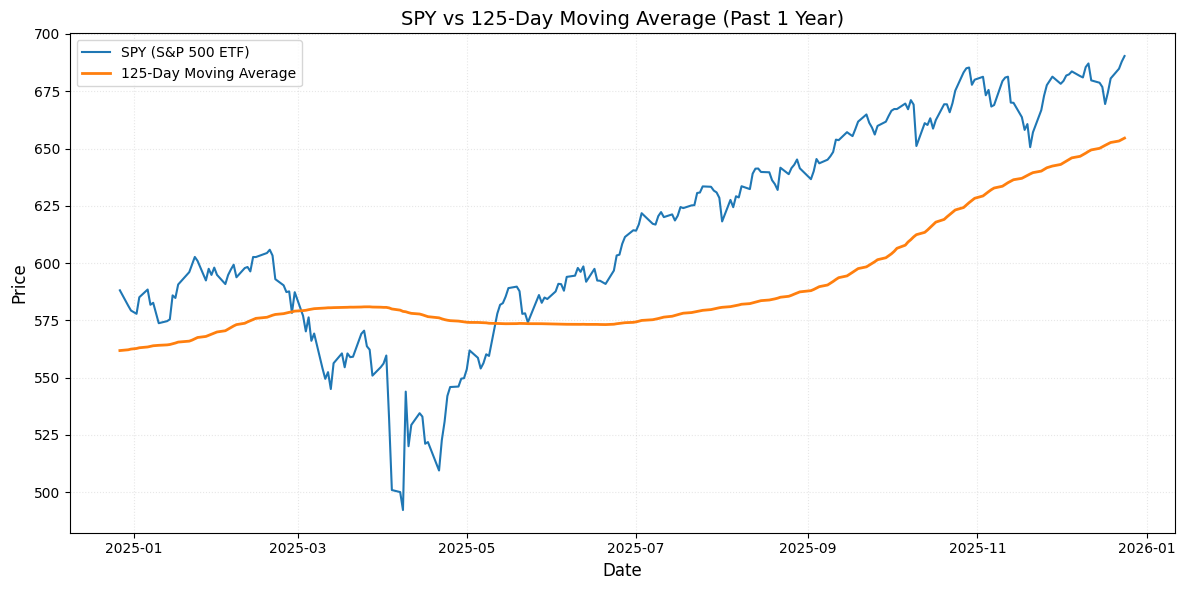

In [ ]:
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# Define timeframe
  # set today as end date
  # set 1 year PLUS a buffer of 250 days (for 125-day moving average) as start date
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=365 + 250)

# Fetch SPY data from yfinance
  # skips weekends and holidays
df = yf.download('SPY', start=start_date, end=end_date, auto_adjust=True, progress=False)['Close']
df = df.dropna()

# Calculate 125-day moving average
df['125MA'] = df['SPY'].rolling(window=125).mean()

# Filter data to display only the last 365 days
  # drop buffer in plot
plot_data = df.loc[df.index > (end_date - datetime.timedelta(days=365))]

# Generate plot
plt.figure(figsize=(12, 6))
plt.plot(plot_data.index, plot_data['SPY'], label='SPY (S&P 500 ETF)', linewidth=1.5)
plt.plot(plot_data.index, plot_data['125MA'], label='125-Day Moving Average', linewidth=2)

plt.title('SPY vs 125-Day Moving Average (Past 1 Year)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, linestyle=':', alpha=0.3)
plt.tight_layout()

plt.show()
